#importing libraries

In [3]:
from keras_preprocessing.image import ImageDataGenerator

In [4]:
train_data = ImageDataGenerator(rescale= 1./255, shear_range= 0.2,
                                zoom_range = 0.2, horizontal_flip = True)
test_data = ImageDataGenerator(rescale= 1./255)

#collecting training and testing data

In [5]:
train_data = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/training_set',
                                            target_size = (64,64),
                                            batch_size = 100,
                                            class_mode = 'binary')
test_data = test_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/test_set',
                                          target_size=(64, 64),
                                          batch_size = 100,
                                          class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#creating model

In [6]:
import numpy as np
import keras

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [8]:
model = Sequential()
model.add(Conv2D(filters = 64,kernel_size = 3,padding = 'same',  activation = 'relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32,kernel_size = 3,padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [10]:
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))
model.add(Dense(units = 512, activation = 'relu',kernel_initializer='uniform'))


In [11]:
model.add(Dense(units = 1, activation= 'sigmoid', kernel_initializer= 'uniform'))
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'] )

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [13]:
from keras_preprocessing.image import ImageDataGenerator

In [14]:
train_data = ImageDataGenerator(rescale= 1./255, shear_range= 0.2,
                                zoom_range = 0.2, horizontal_flip = True)

In [15]:
test_data = ImageDataGenerator(rescale= 1./255)

In [16]:
train_data = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/training_set',
                                            target_size = (64,64),
                                            batch_size = 100,
                                            class_mode = 'binary')


Found 2000 images belonging to 2 classes.


In [17]:
train_data

In [18]:
test_data = test_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/test_set',
                                          target_size=(64, 64),
                                          batch_size = 100,
                                          class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# load the image
img = load_img('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/training_set/cats/cat.100.jpg')
print("Orignal:" ,type(img))

# convert to numpy array
img_array = img_to_array(img)
print("NumPy array info:") 
print(type(img_array))    

print("type:",img_array.dtype)
print("shape:",img_array.shape)
# convert back to image

img_pil = array_to_img(img_array)
print("converting NumPy array:",type(img_pil))

Orignal: <class 'PIL.JpegImagePlugin.JpegImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (499, 403, 3)
converting NumPy array: <class 'PIL.Image.Image'>


In [21]:
from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience= 10 )

In [24]:
model.fit_generator(train_data,
                    
                    steps_per_epoch=20,
                    epochs = 50,
                    validation_steps = 100,callbacks = [earlyStopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 386s 19s/step - loss: 0.6938 - accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 0.6922 - accuracy: 0.5235
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.6928 - accuracy: 0.5075
Epoch 4/50
20/20 [==============================] - 24s 1s/step - loss: 0.6808 - accuracy: 0.5735
Epoch 5/50
20/20 [==============================] - 24s 1s/step - loss: 0.6466 - accuracy: 0.6410
Epoch 6/50
20/20 [==============================] - 24s 1s/step - loss: 0.6433 - accuracy: 0.6265
Epoch 7/50
20/20 [==============================] - 24s 1s/step - loss: 0.6083 - accuracy: 0.6800
Epoch 8/50
20/20 [==============================] - 24s 1s/step - loss: 0.5760 - accuracy: 0.7050
Epoch 9/50
20/20 [==============================] - 24s 1s/step - loss: 0.5543 - accuracy: 0.7035
Epoch 10/50
20/20 [==============================] - 24s 1s/step - loss: 0.5392 - accuracy: 0.7365
Epoch 11/50
20/20

#testing the model




In [25]:
import numpy as np
from keras.preprocessing import image

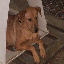

In [26]:
new_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/CNN/CNN-DOG_CAT CLASSIFICATION/training_set/dogs/dog.100.jpg', target_size=(64,64))
new_image

In [27]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)

In [28]:
new_image.ndim

4

#result of model:-

In [29]:
result = model.predict(new_image)

In [30]:
if result[0][0] < 0.5:
  print('it is a cat')
else:
  print('it is a dog')

it is a dog
